## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from neuralprophet import NeuralProphet
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

c:\Miniconda3\envs\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Load Data

In [3]:
df_week_2020_23 = pd.read_csv('./VolumeDataset_2020_to_2023.csv').drop('Unnamed: 0', axis=1)
df_daily_2021_23 = pd.read_csv('./data_dailly_2021_to_2023.csv')
df_month_2021_23 = pd.read_csv('./data_month_2021_to_2023.csv')
jan_df = pd.read_excel('./jan_2024.xlsx')

337745.01
60682.640000000014
183009.8600000001


<Figure size 1000x300 with 0 Axes>

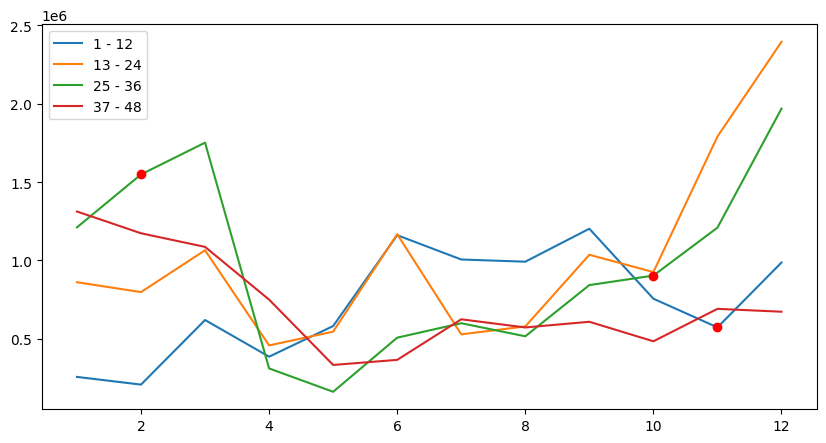

In [17]:
def gradient(x1,y1, x2, y2):
    return (y2-y1)/(x2-x1)


def compare(a,b,c,d):
    l = sorted([a,b,c,d])
    
    if l[0][0]<0 and l[1][0]>0 and abs(l[0][0])>100000:
        print(abs(l[0][0]))
        return l[0][1]
    elif l[2][0]<0 and l[3][0]>0 and abs(l[0][0])>100000:
        print(abs(l[3][0]))
        return l[3][1]
    
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 10})
gradient_l = [(0.0,(0))]
for i in range(1,48):
    # print(df_month_2021_23.loc[i-1, "Month"])
    x1,y1 = df_month_2021_23.loc[i-1, "Month"],df_month_2021_23.loc[i-1, "E1"]
    x2,y2 = df_month_2021_23.loc[i, "Month"],df_month_2021_23.loc[i, "E1"]
    # print(f'gradient of {i-1}, {i} -> {gradient(x1,y1,x2,y2)}')
    gradient_l.append((gradient(x1,y1,x2,y2),y2))

# for i in range(1, 48, 12):
#     plt.plot(df_month_2021_23.loc[:11, "Month"], df_month_2021_23.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}", marker = '*')
#     plt.legend()
markers = []
markers_index = []
for i in range(1,12):
    if (x:= compare(gradient_l[i],gradient_l[i+12],gradient_l[i+24],gradient_l[i+36])) is not None:
        markers_index.append(i+1)
        markers.append(x)
plt.figure(figsize=(10,5))
for i in range(1, 48, 12):
    plt.plot(df_month_2021_23.loc[:11, "Month"],
             df_month_2021_23.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}")
    plt.legend()
plt.plot(markers_index, markers, "o", color="red")

In [50]:
df_e1 = df_month_2021_23[['Month', 'E1']]
df_e1.head()

,Month,E1
0,1,257151.31
1,2,208028.44
2,3,620054.99
3,4,386198.01
4,5,581634.38


In [51]:
flag_list = []
for i, m in enumerate(markers):
    flag = [0]*48
    d = markers_index[i]-1
    while d<len(df_month_2021_23['E1']):
        if m == df_month_2021_23['E1'][d]:
            flag[d] = 1
            flag_list.append(flag)
            break
        d+=12
for index, flag in enumerate(flag_list):
    df_e1[f'flag: {index}'] =  flag
# print(df_month_2021_23['E1'][25])


In [52]:
df_e1

,Month,E1,flag: 0,flag: 1,flag: 2
0,1,257151.31,0,0,0
1,2,208028.44,0,0,0
2,3,620054.99,0,0,0
3,4,386198.01,0,0,0
4,5,581634.38,0,0,0
5,6,1161493.23,0,0,0
6,7,1006321.61,0,0,0
7,8,992383.85,0,0,0
8,9,1202780.36,0,0,0
9,10,756153.86,0,0,0
